In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("Datasets/cov2/covid_19_data.csv")

In [3]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
4930,4931,03/11/20,Mississippi,US,2020-03-10T02:33:04,0,0,0
4931,4932,03/11/20,North Dakota,US,2020-03-10T02:33:04,0,0,0
4932,4933,03/11/20,West Virginia,US,2020-03-10T02:33:04,0,0,0
4933,4934,03/11/20,Wyoming,US,2020-03-10T02:33:04,0,0,0


In [4]:
data[data["Deaths"] == data["Deaths"].max()]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4719,4720,03/11/20,Hubei,Mainland China,2020-03-11T10:53:02,67773,3046,49134


In [5]:
country_data = data.groupby('Country/Region')

In [6]:
max_Death = country_data.sum().sort_values("Deaths")[:-10:-1]

In [7]:
max_conf = country_data.sum().sort_values("Confirmed")[:-10:-1]

In [8]:
max_recovered = country_data.sum().sort_values("Recovered")[:-10:-1]

In [9]:
max_Death.drop("SNo", axis =1, inplace = True)
max_conf.drop("SNo", axis =1, inplace = True)
max_recovered.drop("SNo", axis =1, inplace = True)

In [10]:
max_Death["Country"] = max_Death.index

In [11]:
max_Death

,Confirmed,Deaths,Recovered,Country
Country/Region,,,,
Mainland China,2554465,80616,961283,Mainland China
Italy,66824,3239,5454,Italy
Iran,54206,1912,15142,Iran
South Korea,80824,529,1496,South Korea
France,9688,177,234,France
US,5505,176,174,US
Spain,7619,155,349,Spain
Japan,7040,118,1034,Japan
Others,17780,102,619,Others


<BarContainer object of 9 artists>

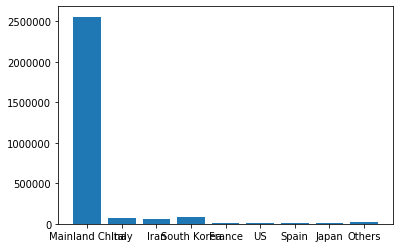

In [12]:
plt.bar(max_Death["Country"], max_Death["Confirmed"])

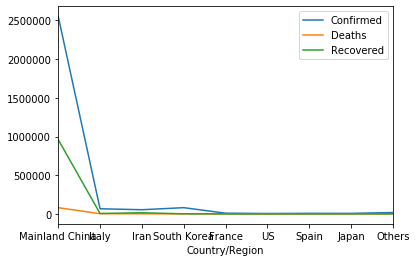

In [13]:
max_Death.plot();

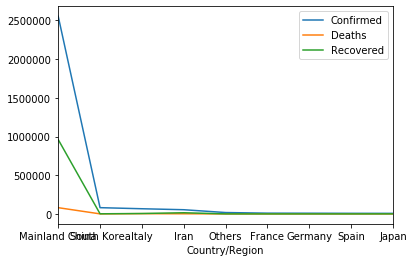

In [14]:
max_conf.plot();

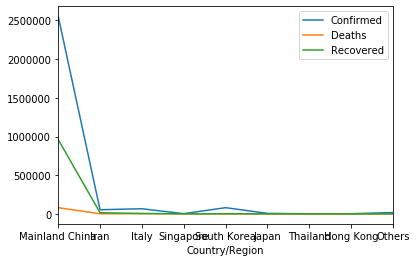

In [15]:
max_recovered.plot();

In [16]:
state = data.groupby('Province/State')

In [17]:
top_15_states = state.sum().sort_values("Confirmed")[:-15:-1]

In [18]:
top_15_states

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
Hubei,86401,2081337,77588,707882
Guangdong,86480,50499,169,25578
Henan,86569,46534,592,27247
Zhejiang,86604,46446,21,25624
Hunan,86645,38040,110,22430
Anhui,86681,35767,179,19881
Jiangxi,86766,33959,31,18809
Shandong,86867,24461,138,11644
Jiangsu,86897,22696,0,13081


In [19]:
top_15_states["min_weather"] = [5, -5, 7, 1, 0, 6, 6, 8,-11, 7,-4,-11,8,-5]
top_15_states["max_weather"] = [18, 16, 15, 20, 19, 19, 19, 17,14,19,10,22,20,16]

In [20]:
top_15_states

,SNo,Confirmed,Deaths,Recovered,min_weather,max_weather
Province/State,,,,,,
Hubei,86401,2081337,77588,707882,5,18
Guangdong,86480,50499,169,25578,-5,16
Henan,86569,46534,592,27247,7,15
Zhejiang,86604,46446,21,25624,1,20
Hunan,86645,38040,110,22430,0,19
Anhui,86681,35767,179,19881,6,19
Jiangxi,86766,33959,31,18809,6,19
Shandong,86867,24461,138,11644,8,17
Jiangsu,86897,22696,0,13081,-11,14


In [21]:
death_data = pd.read_csv("Datasets/cov2/time_series_covid_19_deaths.csv")

In [22]:
death_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,NaN
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
400,NaN,Jamaica,18.1096,-77.2975,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
401,NaN,Reunion,-21.1151,55.5364,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
402,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [23]:
ll = pd.read_csv("Datasets/cov2/COVID19_line_list_data.csv")

In [24]:
ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
Unnamed: 3               0 non-null float64
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   108

<BarContainer object of 1085 artists>

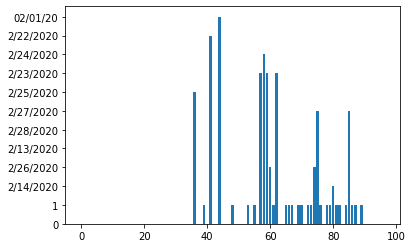

In [25]:
plt.bar(ll.age , ll.death)

In [26]:
ll.death.value_counts()

0            1022
1              42
2/23/2020       4
2/26/2020       3
2/27/2020       2
2/19/2020       2
2/25/2020       2
2/21/2020       2
02/01/20        1
2/22/2020       1
2/24/2020       1
2/13/2020       1
2/14/2020       1
2/28/2020       1
Name: death, dtype: int64

In [27]:
oll = pd.read_csv("Datasets/cov2/COVID19_open_line_list.csv")

In [28]:
oll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
wuhan(0)_not_wuhan(1)       13170 non-null float64
latitude                    13147 non-null float64
longitude                   13147 non-null float64
geo_resolution              13147 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
lives_in_Wuhan              565 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
addi

In [29]:
oll.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


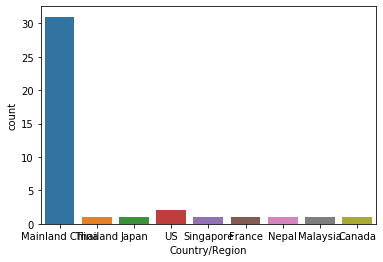

In [38]:
sns.countplot('Country/Region',data=death_data[:40])
#three types of classes are there and their counts
plt.show()

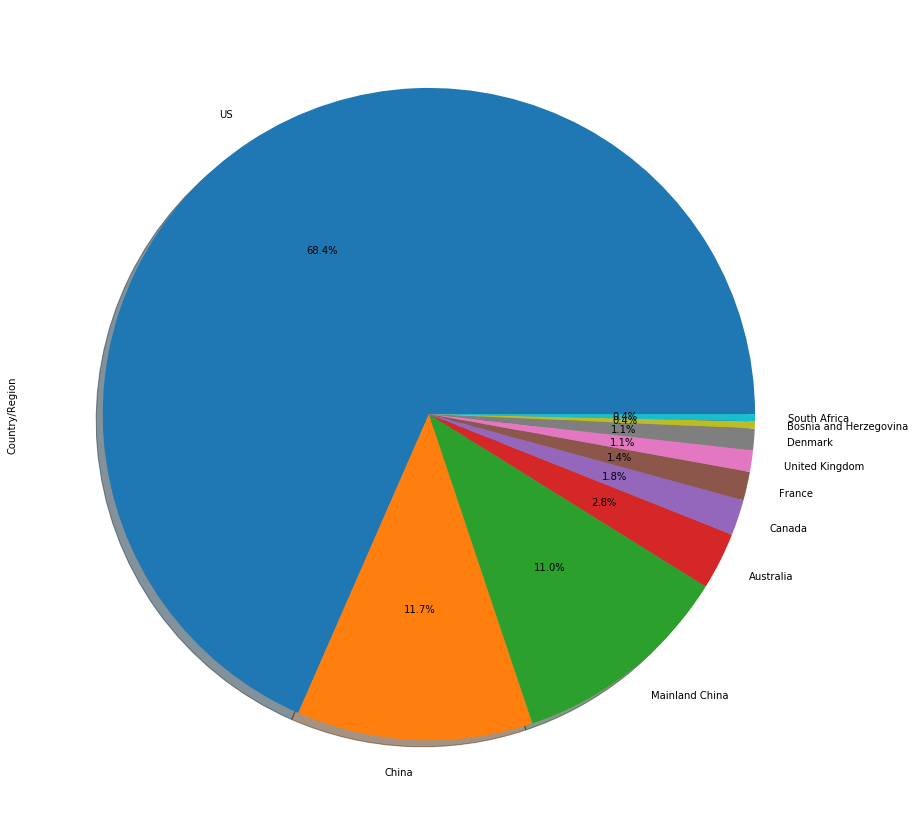

In [57]:
death_data['Country/Region'].value_counts()[:10].plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,15))
plt.show()

In [ ]:
fig=sns.jointplot(x='sepal-length',y='sepal-width',data=dataset)